# Pymaceuticals Inc.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")
# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
merge_df['Mouse ID'].nunique()

249

In [4]:
merge_df.value_counts('Mouse ID').head()

Mouse ID
g989    13
a203    10
n364    10
m546    10
m550    10
dtype: int64

In [5]:
duplicate_df = merge_df.set_index('Mouse ID')
duplicate_df.loc['g989']

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [6]:
duplicate_df.loc['a203'] #making sure that the there's no duplicate in another Mouse ID

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,0,45.000000,0,Infubinol,Female,20,23
a203,5,48.508468,0,Infubinol,Female,20,23
a203,10,51.852437,1,Infubinol,Female,20,23
a203,15,52.777870,1,Infubinol,Female,20,23
a203,20,55.173336,1,Infubinol,Female,20,23
a203,25,56.793208,1,Infubinol,Female,20,23
a203,30,59.523197,1,Infubinol,Female,20,23
a203,35,61.931650,2,Infubinol,Female,20,23
a203,40,63.593490,2,Infubinol,Female,20,23


In [7]:
updated_df = duplicate_df.drop(['g989'])

In [8]:
updated_df.value_counts('Mouse ID').head() #making sure 'g989' is gone

Mouse ID
a203    10
l897    10
m546    10
m550    10
m601    10
dtype: int64

In [9]:
mouse_df = updated_df.reset_index()

In [10]:
mouse_df['Mouse ID'].nunique()

248

In [11]:
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


# Summary Statistics 

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [13]:
regimen_df = mouse_df.groupby(['Drug Regimen'])

regimen_mean = regimen_df['Tumor Volume (mm3)'].mean()
regimen_med = regimen_df['Tumor Volume (mm3)'].median()
regimen_var = regimen_df['Tumor Volume (mm3)'].var()
regimen_std = regimen_df['Tumor Volume (mm3)'].std()
regimen_sem = regimen_df['Tumor Volume (mm3)'].sem()

regimen_summ_df = pd.DataFrame({
                        "Mean Tumor Volume": regimen_mean,
                        "Median Tumor Volume" : regimen_med,
                        "Tumor Volume Variance" : regimen_var,
                        "Tumor Volume Std. Dev." : regimen_std,
                        "Tumor Volume Std. Err." : regimen_sem
                        })
regimen_summ_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

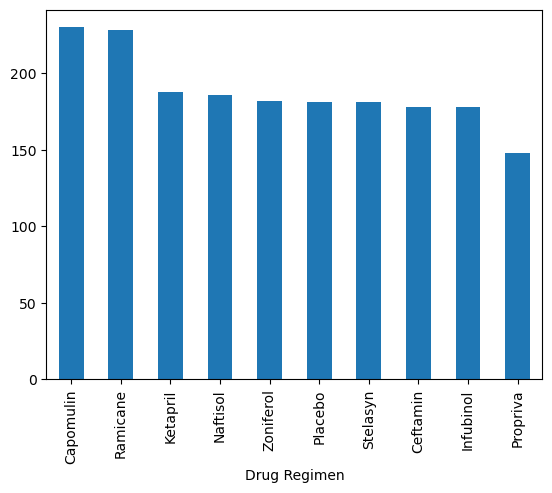

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# x = Drug Regimen, Y = Number of Mice Tested
drug_regimen_groups = mouse_df.groupby('Drug Regimen')
timepoints = drug_regimen_groups['Timepoint'].count()
#Chart data
timepoints.sort_values(ascending=False).plot.bar()

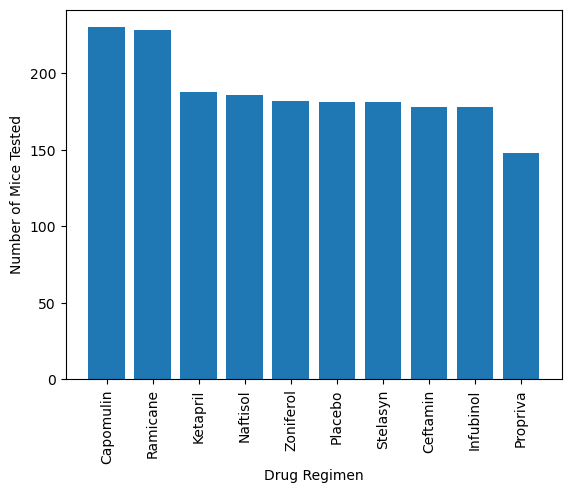

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints2 = timepoints.sort_values(ascending=False)
plt.bar(timepoints2.index, timepoints2.values)
plt.ylabel('Number of Mice Tested') 
plt.xlabel('Drug Regimen') 
plt.xticks(rotation='vertical') 
plt.show()

<AxesSubplot:ylabel='Sex'>

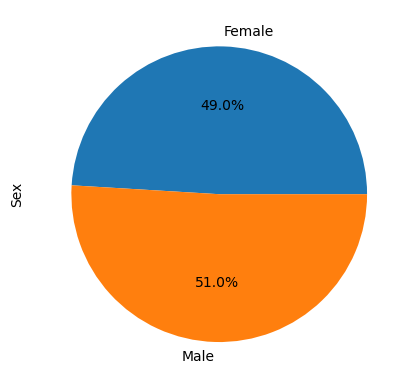

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = mouse_df.groupby('Sex')
gender_count = gender['Sex'].count()
gender_count.plot.pie(autopct='%1.1f%%')

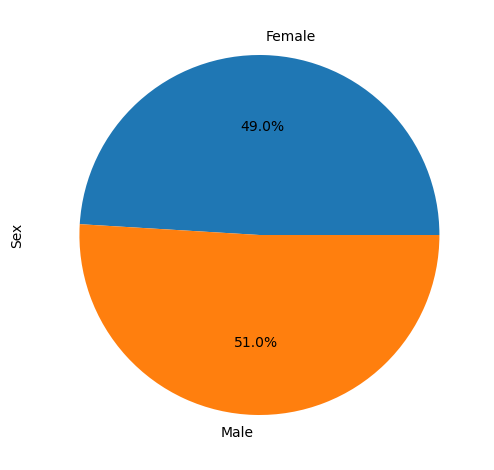

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Female', 'Male'
plt.pie(gender_count, labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.tight_layout()
plt.show()

# Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_df.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tv = pd.merge(mouse_df, last_timepoint, how = 'right', on = ('Mouse ID', 'Timepoint'))
last_tv.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
cap_tvdata = []
ram_tvdata = []
infu_tvdata = []
ceft_tvdata = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
#For this portion I had to look it up on google and found my answer on stack overflow 
#https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

for index, row in last_tv.iterrows():
    if row["Drug Regimen"] == treatments[0]:
        cap_tvdata.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        ram_tvdata.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        infu_tvdata.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        ceft_tvdata.append(row['Tumor Volume (mm3)'])

    
    # add subset     

treatments_df = pd.DataFrame({treatments[0]: cap_tvdata,
                             treatments[1]: ram_tvdata,
                             treatments[2]: infu_tvdata,
                            treatments[3]: ceft_tvdata})
treatments_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [25]:
# Determine outliers using upper and lower bounds
cap_quartiles = treatments_df['Capomulin'].quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} could be outliers for Capomulin.")
print(f"Values above {cap_upper_bound} could be outliers for Capomulin.")

ram_quartiles = treatments_df['Ramicane'].quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers for Ramicane.")
print(f"Values above {ram_upper_bound} could be outliers for Ramicane.")

infu_quartiles = treatments_df['Infubinol'].quantile([.25,.5,.75])
infu_lowerq = infu_quartiles[0.25]
infu_upperq = infu_quartiles[0.75]
infu_iqr = infu_upperq-infu_lowerq

infu_lower_bound = infu_lowerq - (1.5*infu_iqr)
infu_upper_bound = infu_upperq + (1.5*infu_iqr)
print(f"Values below {infu_lower_bound} could be outliers for Infubinol.")
print(f"Values above {infu_upper_bound} could be outliers for Infubinol.")

ceft_quartiles = treatments_df['Ceftamin'].quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq

ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
print(f"Values below {ceft_lower_bound} could be outliers for Ceftamin.")
print(f"Values above {ceft_upper_bound} could be outliers for Ceftamin.")     

Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.
Values below 25.355449580000002 could be outliers for Ceftamin.
Values above 87.66645829999999 could be outliers for Ceftamin.


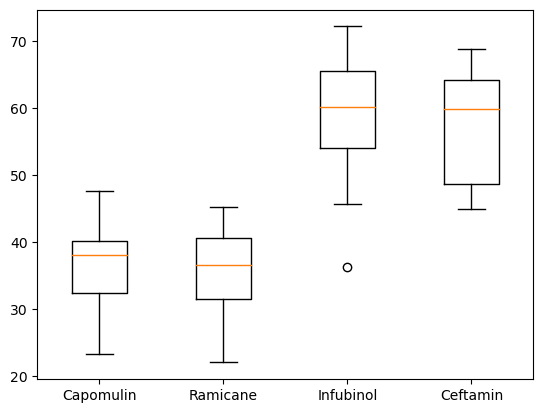

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_ftv_list =  [treatments_df['Capomulin'], treatments_df['Ramicane'], treatments_df['Infubinol'], treatments_df['Ceftamin']] 
plt.boxplot(boxplot_ftv_list)
plt.xticks([1, 2, 3, 4], treatments)
plt.show()